In [77]:
import matplotlib.pyplot as plt
import numpy as np

In [136]:
file_ver = ['v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v6']
agg = 100

In [137]:
all_epoch_mean_return_agg = []
all_epoch_mean_succ_agg = []

for ver in file_ver:
    with open(f'all_outputs/{ver}_output.txt') as f:
        lines = [line.rstrip() for line in f]

    epoch_mean_return = []
    epoch_mean_len = []
    epoch_mean_succ = []
    mean_agg_100 = []
    x_epoch = []
    x_mean_agg = []
    mean_agg_c = 0
    ep_c = 1
    agg_arr = []
    agg_c = 1

    for out in lines:
        out_l = out.split()
        if out_l[0] == 'Epoch:':
            epoch_mean_return.append(float(out_l[4][:-1]))
            epoch_mean_len.append(float(out_l[7][:-1]))
            epoch_mean_succ.append(float(out_l[10]))
            x_epoch.append(ep_c)
            ep_c += 1
        elif out_l[0] == 'Mean':
            mean_agg_100.append(float(out_l[2]))
            x_mean_agg.append(mean_agg_c*100)
            mean_agg_c += 1

    epoch_mean_succ_agg = []
    for i, val in enumerate(epoch_mean_succ):
        if i%agg == 0 and i!=0:
            epoch_mean_succ_agg.append(sum(epoch_mean_succ[i-agg:i])/len(epoch_mean_succ[i-agg:i]))
            agg_arr.append(agg_c*agg)
            agg_c += 1

    epoch_mean_return_agg = []
    for i, val in enumerate(epoch_mean_return):
        if i%agg == 0 and i!=0:
            epoch_mean_return_agg.append(sum(epoch_mean_return[i-agg:i])/len(epoch_mean_return[i-agg:i]))
            
    all_epoch_mean_succ_agg.append(epoch_mean_succ_agg)
    all_epoch_mean_return_agg.append(epoch_mean_return_agg)

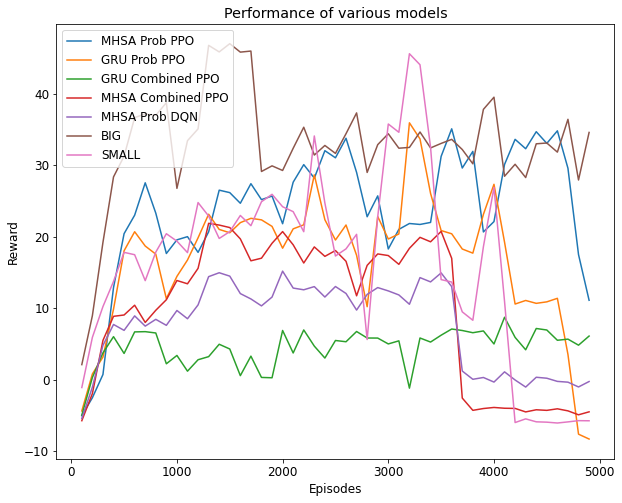

23.775306122448974 16.891237755102043 4.554797959183674 9.821130612244898 7.7145975510204075 32.790469387755095 16.22832857142857


In [139]:
tr_avg = [(g + h) / 2 for g, h in zip(all_epoch_mean_return_agg[0], all_epoch_mean_return_agg[1])]
gru_avg = [(g + h) / 2 for g, h in zip(all_epoch_mean_return_agg[0], all_epoch_mean_return_agg[2])]
gru_com = all_epoch_mean_return_agg[3]
tr_com = all_epoch_mean_return_agg[4]
# big_tr = all_epoch_mean_return_agg[5]
# small_tr = all_epoch_mean_return_agg[6]

dqn = [g*0.6 + h*0.4 for g, h in zip(tr_com, gru_com)]

names = ['MHSA Prob PPO', 'GRU Prob PPO', 'GRU Combined PPO', 'MHSA Combined PPO', 'MHSA Prob DQN']#, 'BIG', 'SMALL']

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 12})

for name, arr in zip(names, [tr_avg]+[gru_avg]+[gru_com]+[tr_com]+[dqn]):#+[big_tr]+[small_tr]):
    plt.plot(agg_arr[:50], arr[:50], label=name)

plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Performance of various models")
plt.legend()
plt.show()
print(np.array(tr_avg).mean(), np.array(gru_avg).mean(), np.array(gru_com).mean(), 
      np.array(tr_com).mean(), np.array(dqn).mean())#,  np.array(big_tr).mean(), np.array(small_tr).mean())

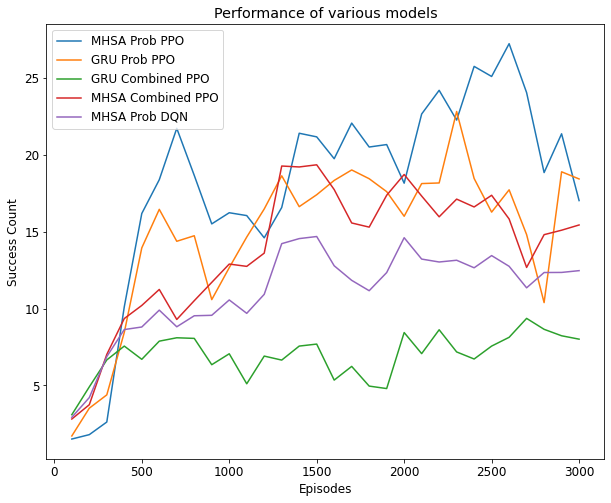

19.88408163265306 15.095714285714285 7.433469387755102 10.79326530612245 9.449346938775513


In [134]:
tr_avg = [(g + h) / 2 for g, h in zip(all_epoch_mean_succ_agg[0], all_epoch_mean_succ_agg[1])]
gru_avg = [(g + h) / 2 for g, h in zip(all_epoch_mean_succ_agg[0], all_epoch_mean_succ_agg[2])]
gru_com = all_epoch_mean_succ_agg[3]
tr_com = all_epoch_mean_succ_agg[4]

dqn = [g*0.6 + h*0.4 for g, h in zip(tr_com, gru_com)]

names = ['MHSA Prob PPO', 'GRU Prob PPO', 'GRU Combined PPO', 'MHSA Combined PPO', 'MHSA Prob DQN']

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 12})

for name, arr in zip(names, [tr_avg]+[gru_avg]+[gru_com]+[tr_com]+[dqn]):
    plt.plot(agg_arr[:30], arr[:30], label=name)

plt.xlabel("Episodes")
plt.ylabel("Success Count")
plt.title("Performance of various models")
plt.legend()
plt.show()
print(np.array(tr_avg).mean(), np.array(gru_avg).mean(), np.array(gru_com).mean(), 
      np.array(tr_com).mean(), np.array(dqn).mean())